<a href="https://colab.research.google.com/github/dvillaj/R_Examples/blob/main/Example_Segmentation_and_dimensionality_reduction_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [11]:
install.packages("C50")
library(C50)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
install.packages("flexclust")
library(flexclust)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



In [9]:
install.packages("modeldata")
library(modeldata)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
data(mlc_churn)

In [13]:
glimpse(mlc_churn)

Rows: 5,000
Columns: 20
$ state                         <fct> KS, OH, NJ, OH, OK, AL, MA, MO, LA, WV,…
$ account_length                <int> 128, 107, 137, 84, 75, 118, 121, 147, 1…
$ area_code                     <fct> area_code_415, area_code_415, area_code…
$ international_plan            <fct> no, no, no, yes, yes, yes, no, yes, no,…
$ voice_mail_plan               <fct> yes, yes, no, no, no, no, yes, no, no, …
$ number_vmail_messages         <int> 25, 26, 0, 0, 0, 0, 24, 0, 0, 37, 0, 0,…
$ total_day_minutes             <dbl> 265.1, 161.6, 243.4, 299.4, 166.7, 223.…
$ total_day_calls               <int> 110, 123, 114, 71, 113, 98, 88, 79, 97,…
$ total_day_charge              <dbl> 45.07, 27.47, 41.38, 50.90, 28.34, 37.9…
$ total_eve_minutes             <dbl> 197.4, 195.5, 121.2, 61.9, 148.3, 220.6…
$ total_eve_calls               <int> 99, 103, 110, 88, 122, 101, 108, 94, 80…
$ total_eve_charge              <dbl> 16.78, 16.62, 10.30, 5.26, 12.61, 18.75…
$ total_night_minutes       

In [19]:
mlc_churn <- mlc_churn %>% mutate(id = row_number())
churnTrain <- mlc_churn %>% 
          sample_frac(.70)
churnTest  <- anti_join(mlc_churn, churnTrain, by = 'id')

In [70]:
set.seed(6)
Clientes_Historicos = select(churnTrain, total_day_charge, total_eve_calls, total_eve_charge)

In [71]:
head(Clientes_Historicos, 10)

total_day_charge,total_eve_calls,total_eve_charge
<dbl>,<int>,<dbl>
32.28,118,16.48
25.69,104,15.93
25.57,99,19.59
29.85,118,13.75
33.44,109,17.87
40.17,114,16.22
35.48,132,19.84
36.06,110,19.88
44.52,99,12.59


In [72]:
clustering_model <- kcca(Clientes_Historicos, k = 3, family = kccaFamily("kmeans"), save.data = TRUE)

In [73]:
Clientes_Historicos %>% 
  mutate(clustering_group = clusters(clustering_model)) %>%
  head()

total_day_charge,total_eve_calls,total_eve_charge,clustering_group
<dbl>,<int>,<dbl>,<int>
32.28,118,16.48,3
25.69,104,15.93,2
25.57,99,19.59,2
29.85,118,13.75,3
33.44,109,17.87,2
40.17,114,16.22,3


In [74]:
dimensionality_reduction_model <- prcomp(Clientes_Historicos)

In [75]:
head(dimensionality_reduction_model$x, 10)

PC1,PC2,PC3
17.9626768,1.494140,0.5571498
3.9041818,-4.961926,1.1963094
-1.0881743,-5.107245,-2.4731952
17.9350322,-0.883892,3.3323974
8.9764451,2.706221,-0.8767958
14.0314346,9.422238,0.6586514
31.9979598,4.507986,-2.8276935
10.0040445,5.279055,-2.9332650
-0.9382191,13.970577,4.1688482
8.8190506,-16.375433,-4.5382469


In [76]:
Clientes_Historicos <- mutate(Clientes_Historicos,
    clustering_group = clusters(clustering_model),
    PC1 = dimensionality_reduction_model$x[, "PC1"],
    PC2 = dimensionality_reduction_model$x[, "PC2"]
  )

In [77]:
head(Clientes_Historicos, 10)

total_day_charge,total_eve_calls,total_eve_charge,clustering_group,PC1,PC2
<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
32.28,118,16.48,3,17.9626768,1.494140
25.69,104,15.93,2,3.9041818,-4.961926
25.57,99,19.59,2,-1.0881743,-5.107245
29.85,118,13.75,3,17.9350322,-0.883892
33.44,109,17.87,2,8.9764451,2.706221
40.17,114,16.22,3,14.0314346,9.422238
35.48,132,19.84,3,31.9979598,4.507986
36.06,110,19.88,2,10.0040445,5.279055
44.52,99,12.59,2,-0.9382191,13.970577


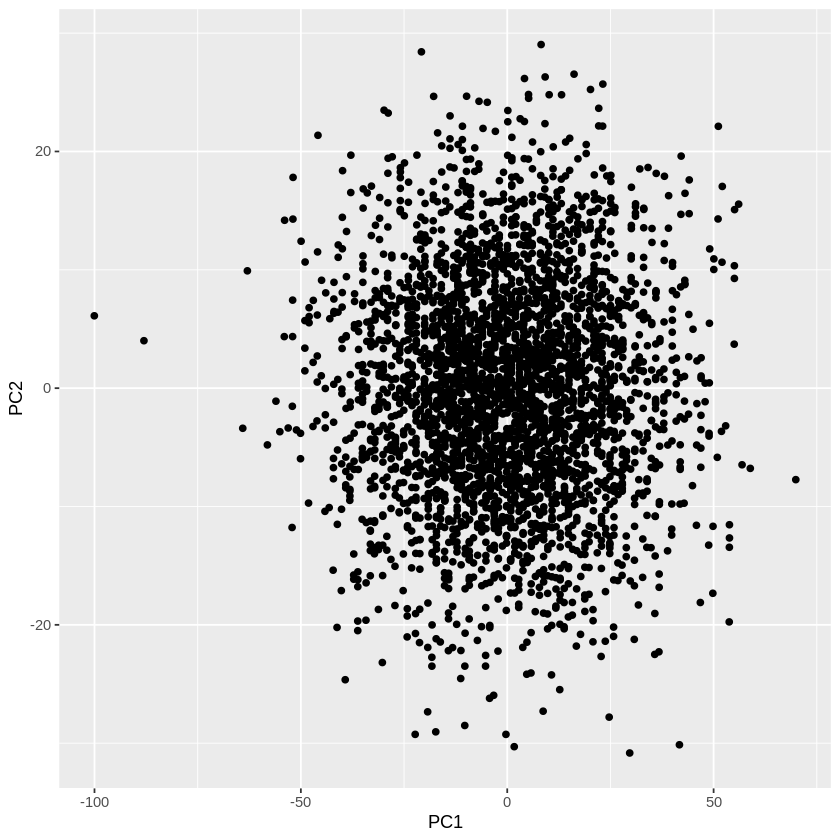

In [78]:
ggplot(Clientes_Historicos, aes(PC1, PC2)) + geom_point()

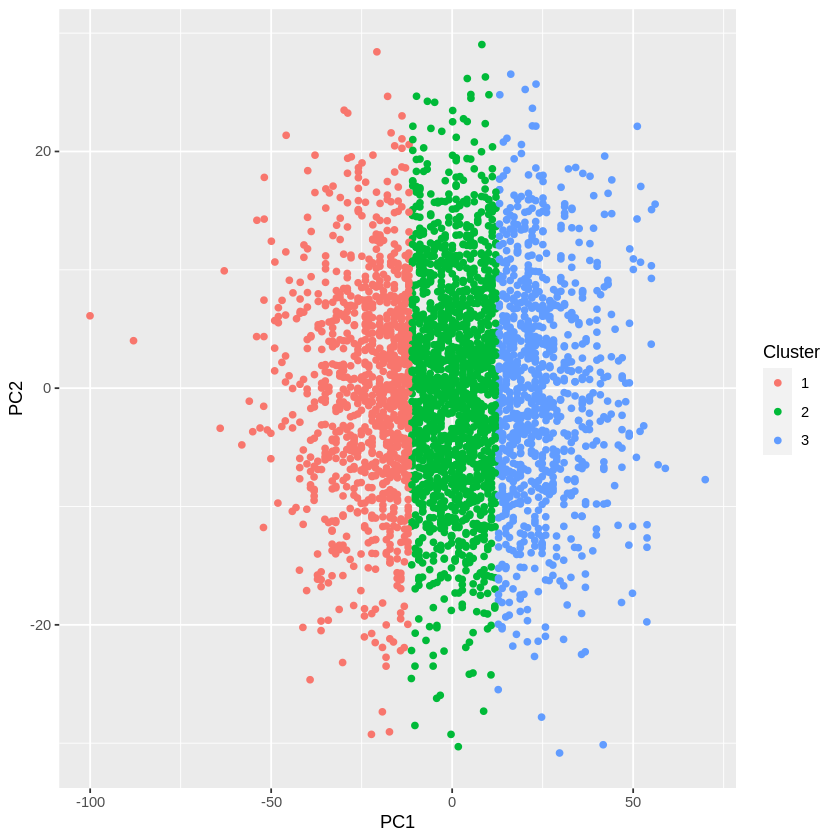

In [79]:
ggplot(Clientes_Historicos, aes(PC1, PC2)) + 
  geom_point(aes(color = factor(clustering_group))) + 
  labs(color = "Cluster")

In [80]:
Clientes_Nuevos <- select(churnTest, total_day_charge, total_eve_calls, total_eve_charge)

In [81]:
head(Clientes_Nuevos, 5)

total_day_charge,total_eve_calls,total_eve_charge
<dbl>,<int>,<dbl>
28.34,122,12.61
37.98,101,18.75
26.69,94,8.76
31.91,148,13.89
26.62,75,21.05


In [82]:
clustering_group_prediction <- clusters(clustering_model, Clientes_Nuevos)

In [83]:
dimensionality_reduction_model_nuevo <- prcomp(Clientes_Nuevos)

In [86]:
Clientes_Nuevos <- mutate(Clientes_Nuevos, 
    clustering_group_prediction,
    PC1 = dimensionality_reduction_model_nuevo$x[, "PC1"],
    PC2 = dimensionality_reduction_model_nuevo$x[, "PC2"])

In [87]:
head(Clientes_Nuevos, 10)

total_day_charge,total_eve_calls,total_eve_charge,clustering_group_prediction,PC1,PC2
<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
28.34,122,12.61,3,21.5044662,2.341401
37.98,101,18.75,2,0.4421459,-7.342771
26.69,94,8.76,2,-6.4748793,4.201828
31.91,148,13.89,3,47.4842510,-1.371360
26.62,75,21.05,1,-25.5160377,4.076651
20.52,76,26.11,1,-24.5068040,10.055761
56.59,97,27.01,2,-3.6665109,-26.117635
10.61,121,14.44,3,20.5751084,20.029535
13.79,72,20.84,1,-28.4596723,16.921218


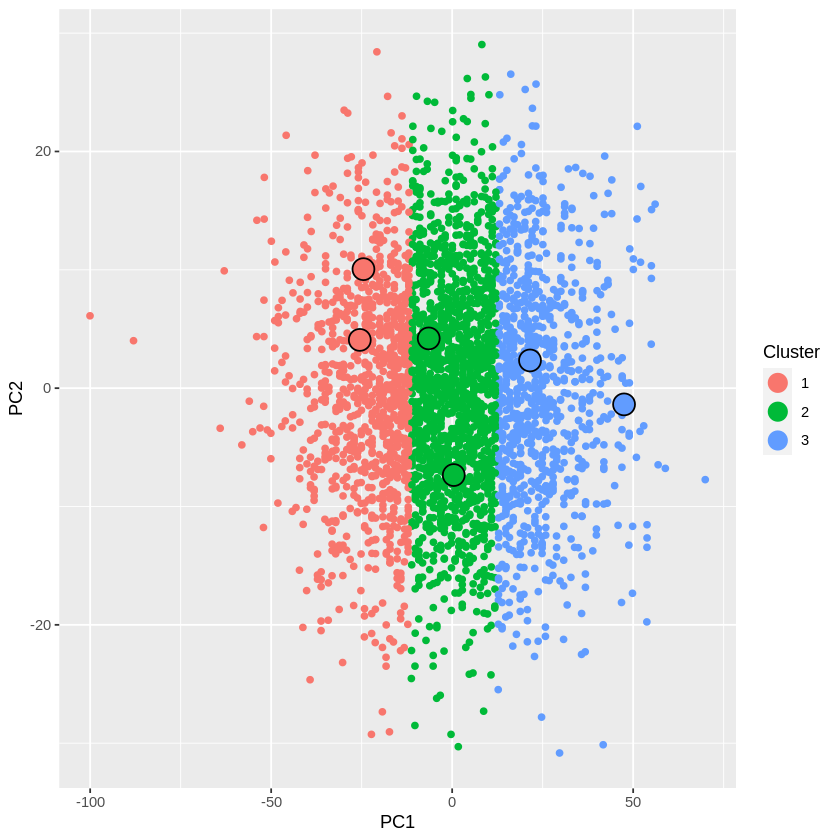

In [94]:
ggplot(Clientes_Historicos, aes(PC1, PC2, color = factor(clustering_group))) + geom_point() + 
  geom_point(data = head(Clientes_Nuevos, 6), size = 6, color = "black") + 
  geom_point(data = head(Clientes_Nuevos, 6), aes( color = factor(clustering_group_prediction)), size = 5)+ 
  labs(color = "Cluster")